# Problem Statement
#### Analysing and visualising Elon Musk's tweet. 
    - Analysing the sentiments and plotting it
    - Analysing the most frequently used words
    - Analysing the @mentions in the tweet and plotting the top @mentions


## Import Library 

   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import warnings
# warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Loading the dataset

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

df = pd.read_csv('/content/gdrive/MyDrive/Dataset/data_elonmusk.csv',encoding='latin1')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


# DATASET PREPROCESSING
    - Cleaning the tweets 

In [5]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")
df.head()

,row ID,Tweet,Time,Retweet from,User,clean_tweet
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,"Assuming max acceleration of 2 to 3 g's, but ..."
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,RT : BFR is capable of transporting satellites...
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,Yup :)
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,Part 2 https://t.co/8Fvu57muhM
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,Fly to most places on Earth in under 30 mins a...


In [7]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,row ID,Tweet,Time,Retweet from,User,clean_tweet
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,Assuming max acceleration of to g s but ...
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,RT BFR is capable of transporting satellites...
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,Yup
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,Part https t co Fvu muhM
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,Fly to most places on Earth in under mins a...


In [8]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,row ID,Tweet,Time,Retweet from,User,clean_tweet
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,Assuming acceleration comfortable direction Wi...
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,capable transporting satellites orbit crew car...
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,Part https muhM
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,most places Earth under mins anywhere under Co...


In [9]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Assuming, acceleration, comfortable, directio...
1    [capable, transporting, satellites, orbit, cre...
2                                                   []
3                                  [Part, https, muhM]
4    [most, places, Earth, under, mins, anywhere, u...
Name: clean_tweet, dtype: object

In [10]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [assum, acceler, comfort, direct, will, feel, ...
1    [capabl, transport, satellit, orbit, crew, car...
2                                                   []
3                                   [part, http, muhm]
4    [most, place, earth, under, min, anywher, unde...
Name: clean_tweet, dtype: object

In [11]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,row ID,Tweet,Time,Retweet from,User,clean_tweet
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,assum acceler comfort direct will feel like mi...
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,capabl transport satellit orbit crew cargo com...
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,part http muhm
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,most place earth under min anywher under cost ...


#1.Sentimental Analysis

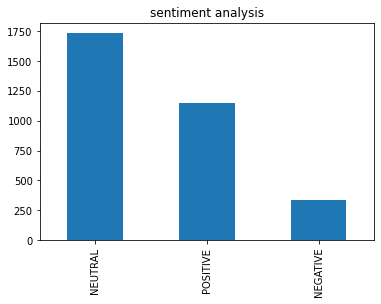

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
sid = SentimentIntensityAnalyzer()
df['sentiment_compound_polarity']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

# 2. Exploratory Data Analysis (EDA)

## Visualize the frequent words

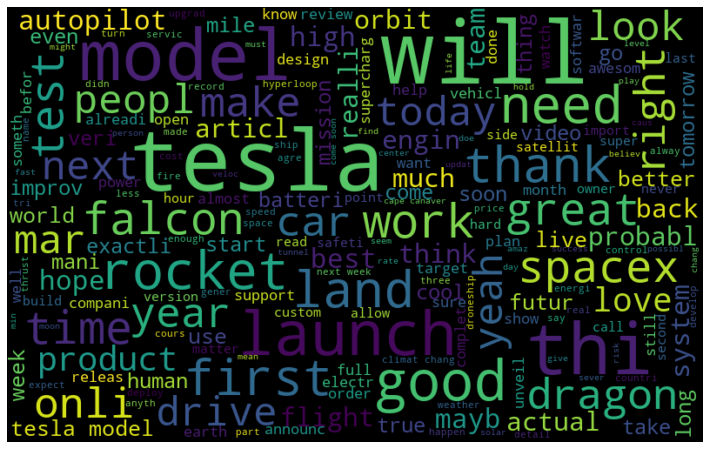

In [13]:
words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3.Analysing the @Mentions in the tweet and Plotting the @Mentions


In [ ]:

#split the time column into hour and date
df['date'] = df['Time'].astype(str)

# split date into 3 columns
df[['date_1','hour']] = df['date'].astype(str).str.split(expand=True)


#convert hour to string
df['hour']= df['hour'].astype(str)

#format hour column as date time
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.time
#format date column as date time
df['date_1'] = pd.to_datetime(df['date_1'], format='%Y-%m-%d')

#add weekday columns 
df['day'] = df['date_1'].dt.weekday
df['day_name'] = df['date_1'].dt.day_name()


In [ ]:
#function to extract the mentions from the tweet
def extract(mention):
    item_list = []
    for row in df['Tweet']:
        items = [tag.strip(mention) for tag in row.split() if tag.startswith(mention)]
        punct = [".","?","!",":","'","]","[",";",","]
        #remove punctuation from, it leaves us with a list of letters
        item_no_punct = [[l for l in item if l not in punct] for item in items]
        #joint the letters back into words
        items_formated = [''.join(item) for item in item_no_punct]
        item_list.append(items_formated)

    #turn a list of lists into one list
    items_list_all = [item for sublist in item_list for item in sublist]
    #turn into a set to chck uniques
    uniques = list(set(items_list_all))
    #count uniques
    number_of_unique_items = len(uniques)
    # frequency dict
    frequency_dict = {i: items_list_all.count(i) for i in items_list_all}
    # convert into df 
    frequency_df = pd.DataFrame(frequency_dict.items(), columns=["word", "count"])
    #sort values
    sorted_frequency = frequency_df.sort_values(by='count',ascending=False)
    
    #get top 10 values
    top_10_df = sorted_frequency.head(10)
    top_10 = list(top_10_df['word'])
    class i_list:
      def __init__(self):
#             no_uniques, list_uniques, full_list
          self.no_uniques = number_of_unique_items
          self.list_uniques = uniques
          self.full_list = items_list_all
          self.sorted_frequency = sorted_frequency
          self.top_10 = top_10
      def how_many(self):
          return f"This set of tweets has {self.no_uniques} unique {mention}s."
      def list_top_10(self):
          return f"The top 10 {mention}s used in this set of tweets are: {self.top_10}."
        
    item_list = i_list()
    
    return item_list
    

In [ ]:
mention_list = extract('@')
mention_list.how_many()

'This set of tweets has 1526 unique @s.'

In [ ]:
mention_frequency_df = mention_list.sorted_frequency

In [ ]:
mention_list.list_top_10()

"The top 10 @s used in this set of tweets are: ['SpaceX', 'TeslaMotors', 'elonmusk', 'NASA', 'Space_Station', 'FredericLambert', 'OpenAI', 'ID_AA_Carmack', 'ElectrekCo', 'bonnienorman']."

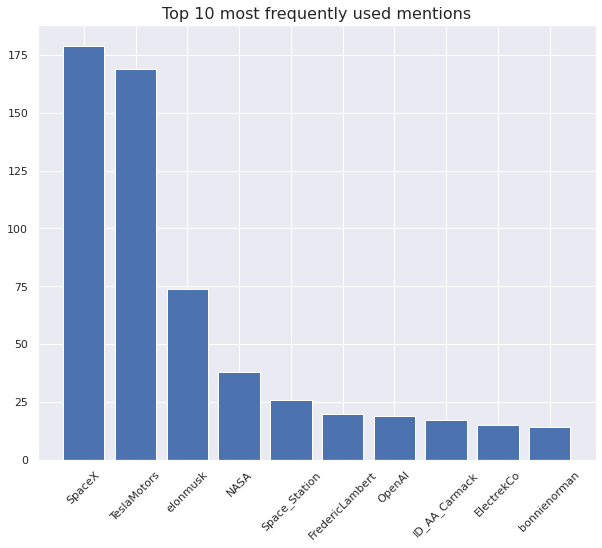

In [ ]:
#plot top 10 most frequently used mentions
fig, ax = plt.subplots(figsize=(10,8))

labels = mention_frequency_df['word'][:10]
y = mention_frequency_df['count'][:10]
x = np.arange(len(labels))

_ = plt.bar(x, height=y)

# ax.set_xticklabels(labels)
plt.xticks(x, labels, rotation=45)
plt.title("Top 10 most frequently used mentions", fontsize=16)
plt.show()

In [ ]:
#function to count the number of mentions in the tweet
def extractor(row, mention):
    words = [tag.strip(mention) for tag in row.split() if tag.startswith(mention)]
    punct = [".","?","!",":","'","]","[",";"]
    #remove punctuation from mentions, it leaves us with a list of letters
    no_punct = [[l for l in item if l not in punct] for item in words]
    #join the letters back into words
    words_formated = [''.join(item) for item in no_punct]
    return words_formated

df['mentions_list'] = df['Tweet'].apply(lambda x: extractor(x, '@'))

#clean column
df['mentions_list'] = df['mentions_list'].astype(str).str.replace(']','').str.replace('[','').str.replace("'","")

#check
df['mentions_list'].head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


0               MeltingIce
1    SpaceX, Space_Station
Name: mentions_list, dtype: object

In [ ]:
#create a  mention_df for further transformation
def m_count(row, h_or_m):
    c = row.count(h_or_m)
    return c

df['sum_mentions']= df['Tweet'].apply(lambda row: m_count(row,'@')) 
mention_df = df[['date', 'hour', 'day', 'mentions_list','sum_mentions']]

# set date as index
mention_df['date'] = pd.to_datetime(df['date'])
mention_df_re = mention_df.set_index('date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
mention_sum_by_day = mention_df_re.resample('D').sum()
mention_sum_by_day.drop(columns="day", inplace=True)

In [ ]:
tweets_per_day = mention_df_re.index.value_counts().sort_index()
print(tweets_per_day)

#join on index with the previous df
mention_and_tweet=mention_sum_by_day.join(tweets_per_day)

#rename the added column
mention_and_tweet = mention_and_tweet.rename(columns={'date':'sum_tweets'})

# turn nans to 0s & convert to interger
mention_and_tweet['sum_tweets'] = mention_and_tweet['sum_tweets'].fillna('0').astype(int)

#check
mention_and_tweet.head()

2012-11-16 17:59:47    1
2012-11-19 08:59:46    1
2012-11-20 08:30:44    1
2012-11-20 08:38:31    1
2012-11-20 08:52:03    1
                      ..
2017-09-29 09:19:21    1
2017-09-29 09:56:12    1
2017-09-29 10:39:57    1
2017-09-29 10:44:54    1
2017-09-29 17:39:19    1
Name: date, Length: 3217, dtype: int64


,sum_mentions,sum_tweets
date,,
2012-11-16,3,0
2012-11-17,0,0
2012-11-18,0,0
2012-11-19,0,0
2012-11-20,1,0


In [ ]:
tweet_sum = mention_and_tweet['sum_tweets'].sum()
mention_sum = mention_and_tweet['sum_mentions'].sum()
ht_ratio = mention_sum/tweet_sum
print("Overall there has been", tweet_sum, "tweets sent in the time period and", mention_sum, 
     "mentions used. This gives a ratio of", round(ht_ratio,2), "which means there is an average of just over 1 mention per tweet.")

Overall there has been 0 tweets sent in the time period and 2867 mentions used. This gives a ratio of inf which means there is an average of just over 1 mention per tweet.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


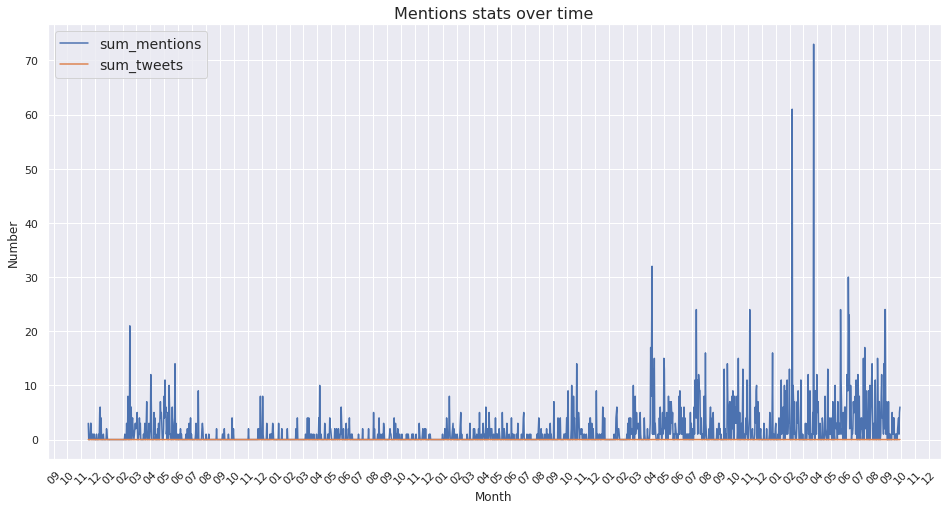

In [ ]:
# plot number of mentions and tweets per day

sns.set()

def plot_mention_by_day(variable_1, variable_2=None):
    fig, ax = plt.subplots(figsize=(16,8))

    #set xand y axes
    x = mention_and_tweet.index
    y = mention_and_tweet[variable_1]

    #plot
    ax.plot(x, y, label=variable_1)
    
    #add other plots if variables given
    if variable_2 != None:
        y1 = mention_and_tweet[variable_2]
        ax.plot(x, y1, label=variable_2)

    months = mdates.MonthLocator() 
    month_fmt = mdates.DateFormatter('%m')

    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(month_fmt)
    ax.tick_params(axis='x', rotation=45)

    ax.set_title("Mentions stats over time", fontsize=16)
    ax.set_ylabel('Number') 
    ax.set_xlabel('Month')

    plt.legend(fontsize=14)
    plt.show()
    
plot_mention_by_day('sum_mentions', 'sum_tweets')